In [1]:
!pip install -U pycoingecko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import requests
import datetime as dt
import pandas as pd
import numpy as np

In [3]:
from google.colab import files

In [4]:
!pip install pycoingecko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!cp /content/drive/MyDrive/Colab\ Notebooks/CoinGeckoFunctions_2.py /content

In [6]:
import CoinGeckoFunctions_2 as cgf

In [9]:
!pip install Tokenterminal
from tokenterminal import TokenTerminal
token_terminal = TokenTerminal(key='6c37f0ff-5c2b-4564-8286-3bccf6e42fd2')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from google.colab import files
!cp /content/drive/MyDrive/Colab\ Notebooks/TokenTerminal_Functions_2.py /content
import TokenTerminal_Functions_2 as tt

In [11]:
# CEX spot data

CEX_spot = ['binance','ftx_spot','mxc','gdax','kucoin','huobi','okex','gate','kraken','crypto_com']
days = 1000
CEX_spot_tr_vol = cgf.get_volume_for_list(CEX_spot,days)

In [12]:
# In billions

CEX_spot_tr_vol = CEX_spot_tr_vol/1e9

In [13]:
CEX_spot_tr_vol

,binance,crypto_com,ftx_spot,gate,gdax,huobi,kraken,kucoin,mxc,okex
2020-02-01,1.004803,NaN,0.005595,0.047721,0.153747,0.864302,0.067179,0.048916,1.983349,1.026146
2020-02-02,1.299788,NaN,0.008845,0.071313,0.196800,1.131488,0.097073,0.056483,2.076311,1.107873
2020-02-03,1.468005,NaN,0.007509,0.065889,0.245834,1.088138,0.132919,0.052332,2.068481,1.178905
2020-02-04,1.658409,NaN,0.009334,0.054539,0.216975,0.951319,0.138774,0.056645,2.065441,1.079836
2020-02-05,1.886815,NaN,0.013832,0.092616,0.297482,1.313077,0.190084,0.062615,2.160514,1.310440
...,...,...,...,...,...,...,...,...,...,...
2022-10-23,6.951413,0.108928,0.535114,0.498215,0.539204,0.440342,0.259063,0.649566,1.348262,0.783886
2022-10-24,13.688117,0.236858,1.206114,0.811356,1.579847,0.525994,0.535047,1.061762,2.316802,1.244317
2022-10-25,14.863234,0.348481,1.951499,0.957434,2.252862,0.666004,0.752967,1.253776,5.926300,1.678403
2022-10-26,20.283788,0.420304,2.353713,1.155817,3.071160,0.794146,0.740569,1.746971,5.865157,2.178471


In [14]:
CEX_spot_tr_vol = CEX_spot_tr_vol.fillna(0)

In [15]:
# NEW column - Sum of trading volume CEX

CEX_spot_tr_vol['CEX_sum'] = CEX_spot_tr_vol[list(CEX_spot_tr_vol.columns)].sum(axis=1)

In [16]:
# Fetch project's historical metrics DEX spot Exchanges

uniswap = token_terminal.get_historical_metrics('uniswap')
pancake = token_terminal.get_historical_metrics('pancakeswap')
sushiswap = token_terminal.get_historical_metrics('sushiswap')
dodo = token_terminal.get_historical_metrics('dodo')
balancer = token_terminal.get_historical_metrics('balancer')
quickswap = token_terminal.get_historical_metrics('quickswap')
#traderjoe = token_terminal.get_historical_metrics('traderjoe')
curve = token_terminal.get_historical_metrics('curve')
bancor = token_terminal.get_historical_metrics('bancor')
kyber = token_terminal.get_historical_metrics('kyber')
tokenlon = token_terminal.get_historical_metrics('tokenlon')

In [ ]:
uniswap

In [17]:
VOLUME_uniswap = tt.get_volume(uniswap)


In [18]:
DEX_spot = VOLUME_uniswap.rename({'VOLUME':'VOLUME_uniswap'},axis=1)

In [19]:
# All data in one DataFrame

DEX_spot['VOLUME pancake'] = tt.get_volume(pancake)
DEX_spot['VOLUME sushiswap'] = tt.get_volume(sushiswap)
DEX_spot['VOLUME dodo'] = tt.get_volume(dodo)
DEX_spot['VOLUME balancer'] = tt.get_volume(balancer)
DEX_spot['VOLUME quickswap'] = tt.get_volume(quickswap)
DEX_spot['VOLUME curve'] = tt.get_volume(curve)
DEX_spot['VOLUME bancor'] = tt.get_volume(bancor)
DEX_spot['VOLUME kyber'] = tt.get_volume(kyber)
DEX_spot['VOLUME tokenlon'] = tt.get_volume(tokenlon)

In [20]:
# In billions

DEX_spot = DEX_spot.fillna(0)
DEX_spot = DEX_spot/1e9

In [21]:
DEX_spot

,VOLUME_uniswap,VOLUME pancake,VOLUME sushiswap,VOLUME dodo,VOLUME balancer,VOLUME quickswap,VOLUME curve,VOLUME bancor,VOLUME kyber,VOLUME tokenlon
2020-05-19 00:00:00+00:00,0.000038,0.000000,0.000000,0.0,0.000056,0.000000,0.000000,0.000941,0.002098,0.0
2020-05-20 00:00:00+00:00,0.000251,0.000000,0.000000,0.0,0.000038,0.000000,0.000000,0.000674,0.002609,0.0
2020-05-21 00:00:00+00:00,0.000484,0.000000,0.000000,0.0,0.000073,0.000000,0.000000,0.000734,0.004435,0.0
2020-05-22 00:00:00+00:00,0.000346,0.000000,0.000000,0.0,0.000078,0.000000,0.000000,0.000726,0.002465,0.0
2020-05-23 00:00:00+00:00,0.000297,0.000000,0.000000,0.0,0.000070,0.000000,0.000000,0.001982,0.003066,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-10-22 00:00:00+00:00,0.337508,0.151692,0.029871,0.0,0.025212,0.007563,0.003900,0.000663,0.000070,0.0
2022-10-23 00:00:00+00:00,0.519317,0.169684,0.021589,0.0,0.039692,0.000000,0.016985,0.001014,0.000146,0.0
2022-10-24 00:00:00+00:00,0.758169,0.215489,0.032431,0.0,0.072125,0.000000,0.009017,0.000328,0.000215,0.0
2022-10-25 00:00:00+00:00,1.612195,0.141216,0.052490,0.0,0.098597,0.000000,0.069768,0.000645,0.000439,0.0


In [22]:
# NEW column - Sum od DEX spot daily trading volume

DEX_spot['CEX_sum'] = DEX_spot[list(DEX_spot.columns)].sum(axis=1)

In [23]:
# Same datatime format

df_1 = DEX_spot['CEX_sum']
df_2 = CEX_spot_tr_vol['CEX_sum']

In [24]:
df_2.index = pd.to_datetime(df_2.index).tz_localize('Etc/UCT')

In [25]:
# ratio DEX_spot/CEX_spot daily trading volume in %

pct_DEX_CEX_spot = pd.DataFrame(df_1/df_2)

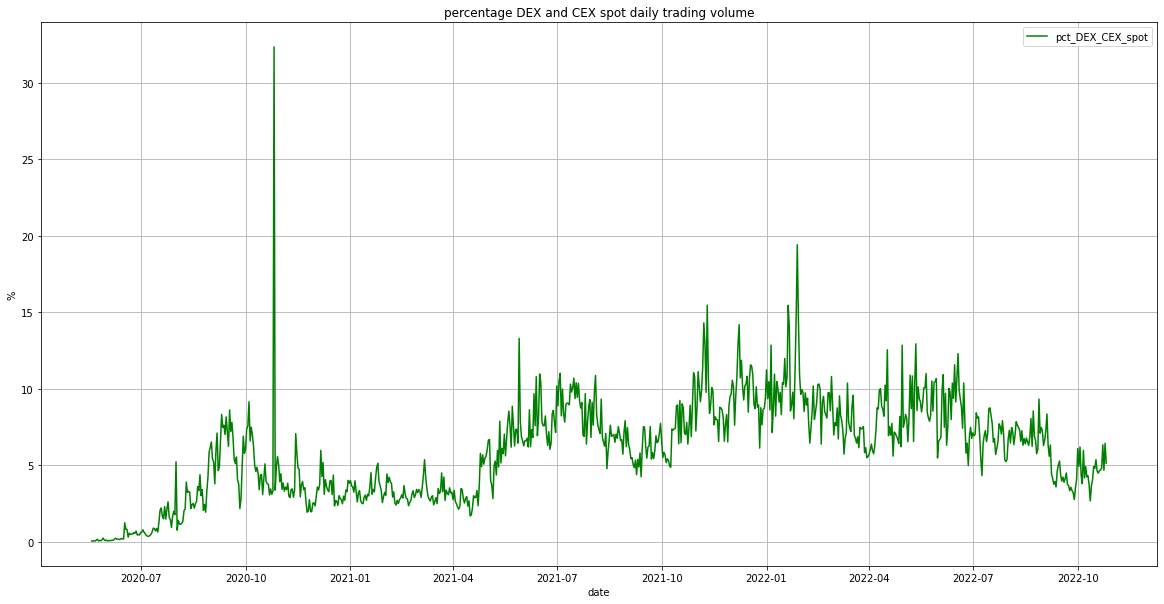

In [26]:
# Plotting ratio DEX_spot/CEX_spot daily trading volume

plt.figure(figsize=(20, 10))
plt.plot(pct_DEX_CEX_spot*100, color='g', label='pct_DEX_CEX_spot')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("date")
plt.ylabel("%")
plt.title("percentage DEX and CEX spot daily trading volume")
  
plt.legend()
plt.grid()
plt.show()

In [27]:
# Daily trading volume of centralized exchanges for derivatives

CEX_der = ['binance_futures','ftx','bitmex','bitrue_futures','okex_swap','huobi_dm','bybit','kraken', 'bitfinex_futures', 'deribit','kumex']
days = 365
CEX_der_tr_vol = cgf.get_volume_for_list(CEX_der,days)

In [28]:
CEX_der_tr_vol = CEX_der_tr_vol/1e9
CEX_der_tr_vol = CEX_der_tr_vol.fillna(0)
CEX_der_tr_vol['CEX_sum'] = CEX_der_tr_vol[list(CEX_der_tr_vol.columns)].sum(axis=1)

In [29]:
# Fetch project's historical metrics

dydx = token_terminal.get_historical_metrics('dydx')
gmx = token_terminal.get_historical_metrics('gmx')
mcdex = token_terminal.get_historical_metrics('mcdex')
synthetix = token_terminal.get_historical_metrics('synthetix')

In [52]:
gmxvol = (tt.get_revenue(gmx))/0.0012

In [53]:
# One DataFrame

VOLUME_dydx = tt.get_volume(dydx)
DEX_der = VOLUME_dydx.rename({'VOLUME':'VOLUME_dydx'},axis=1)
DEX_der['VOLUME gmx'] = gmxvol
DEX_der['VOLUME mcdex'] = tt.get_volume(mcdex)
DEX_der['VOLUME synthetix'] = tt.get_volume(synthetix)

DEX_der = DEX_der.fillna(0)
DEX_der = DEX_der/1e9

DEX_der['DEX_sum'] = DEX_der[list(DEX_der.columns)].sum(axis=1)

In [55]:
# Same datetime format

df_1 = DEX_der['DEX_sum']
df_2 = CEX_der_tr_vol['CEX_sum']
df_2.index = pd.to_datetime(df_2.index).tz_localize('Etc/UCT')
pct_DEX_CEX_der = pd.DataFrame(df_1/df_2)

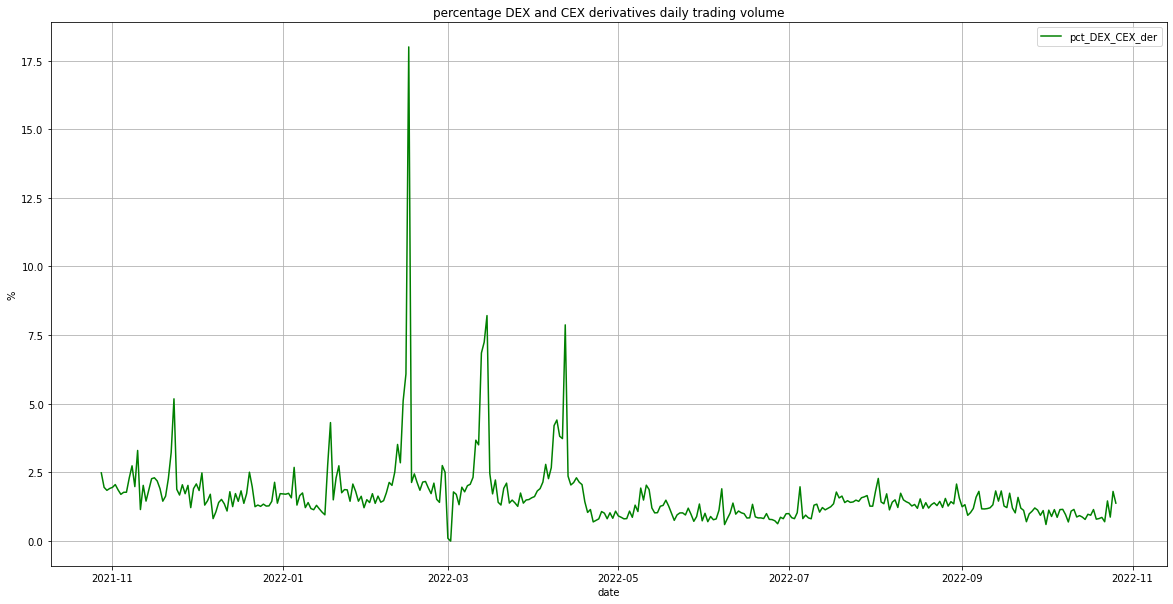

In [56]:
# Plotting ratio DEX_derivatives/CEX_derivatives daily trading volume

plt.figure(figsize=(20, 10))
plt.plot(pct_DEX_CEX_der*100, color='g', label='pct_DEX_CEX_der')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("date")
plt.ylabel("%")
plt.title("percentage DEX and CEX derivatives daily trading volume")
  
plt.legend()
plt.grid()
plt.show()

In [57]:
pct_DEX_der_DEX_spot = pd.DataFrame(DEX_der['DEX_sum']/DEX_spot['CEX_sum'])

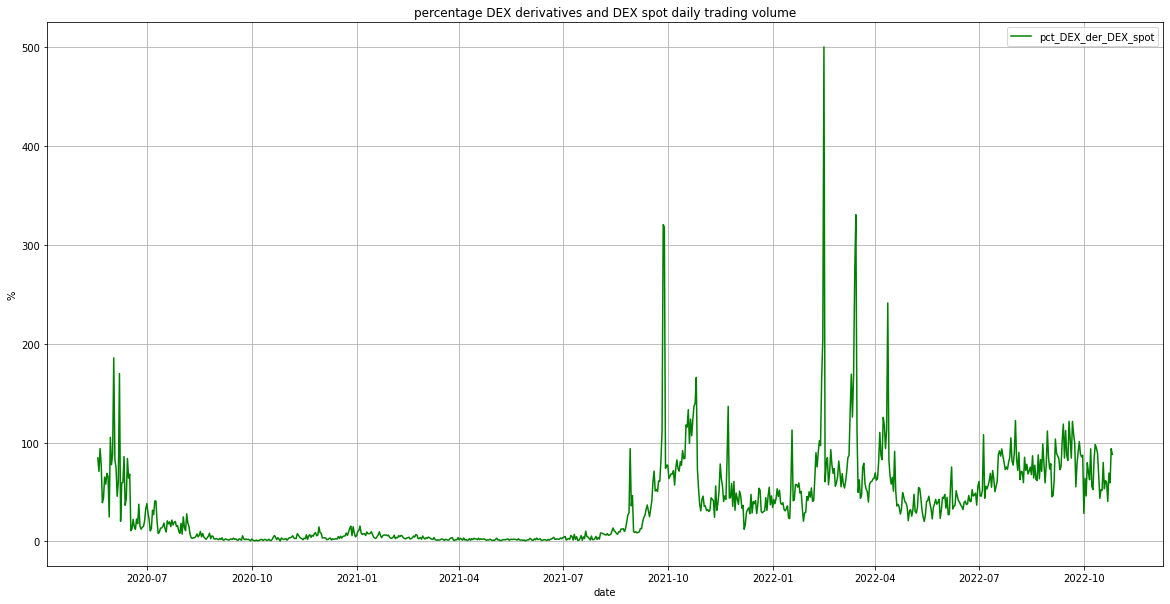

In [58]:
# Plotting ratio CEX_derivatives/CEX_spot daily trading volume

plt.figure(figsize=(20, 10))
plt.plot(pct_DEX_der_DEX_spot*100, color='g', label='pct_DEX_der_DEX_spot')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("date")
plt.ylabel("%")
plt.title("percentage DEX derivatives and DEX spot daily trading volume")
  
plt.legend()
plt.grid()
plt.show()

In [59]:
pct_CEX_der_CEX_spot = pd.DataFrame(CEX_der_tr_vol['CEX_sum']/CEX_spot_tr_vol['CEX_sum'])

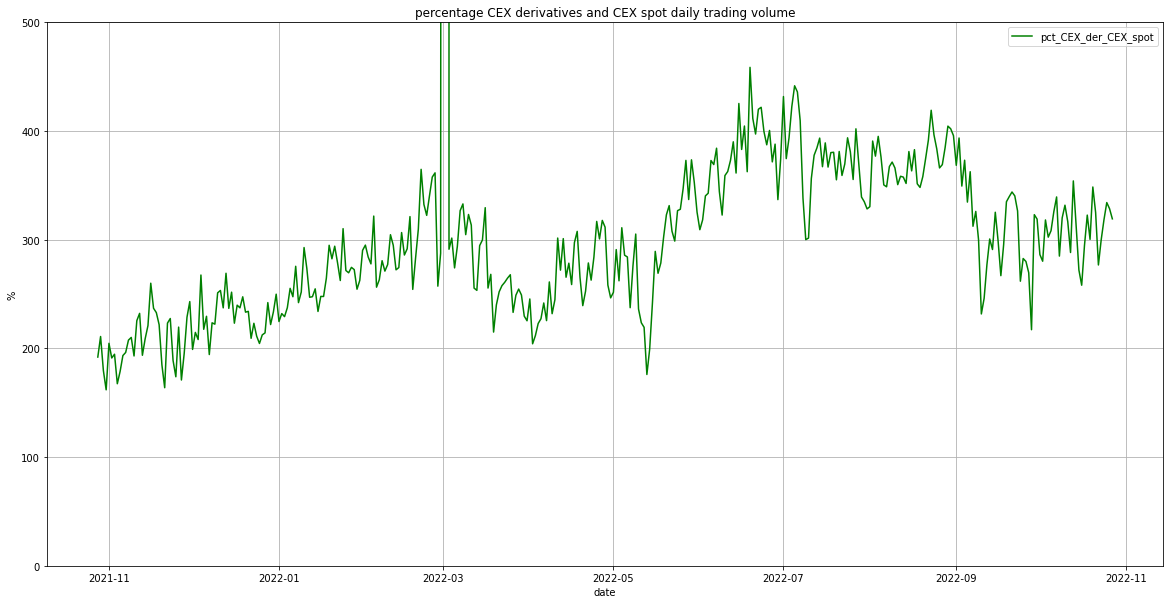

In [60]:
# Plotting ratio CEX_derivatives/CEX_spot daily trading volume

plt.figure(figsize=(20, 10))
plt.ylim(0,500)
plt.plot(pct_CEX_der_CEX_spot*100, color='g', label='pct_CEX_der_CEX_spot')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("date")
plt.ylabel("%")
plt.title("percentage CEX derivatives and CEX spot daily trading volume")
  
plt.legend()
plt.grid()
plt.show()